In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
check = cv2.imread('newcheck.jpeg', 0)
og = cv2.imread('newcheck.jpeg')

_, check = cv2.threshold(check, 100, 255, cv2.THRESH_BINARY_INV)

canny = cv2.Canny(check, 30, 100)
abc = cv2.cvtColor(check, cv2.COLOR_GRAY2RGB)
temp = og * abc
# canny = cv2.dilate(canny, np.ones((3, 3)),iterations=2)
test = cv2.resize(canny, (500, 500))
cv2.imshow('canny', temp)
cnts = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
new = check.copy()
cv2.drawContours(check, [c], 0, (0, 255, 0), 50)

contours = [
    np.array([[100, 180], [200, 280], [200, 180]]),
    np.array([[280, 70], [12, 20], [80, 150]])
]

stencil = np.zeros(new.shape).astype(new.dtype)

# test = cv2.fillPoly(stencil, contours, [255, 255, 255])
test = cv2.resize(check, (500, 500))

result = cv2.bitwise_or(new, stencil)

result = cv2.resize(result, (500, 500))
cv2.imshow('title', test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
image_name = 'IMG_20190203_1151202.jpg'
og = cv2.imread(image_name)
gray = cv2.imread(image_name, 0)

_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

cv2.imwrite('canndsyjasjdn.jpg', thresh)

rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

canny = cv2.Canny(thresh, 30, 100)
canny = cv2.dilate(canny, None,iterations=2)
cnts = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

cropped = og[y:y + h, x:x + w]
cropped_rgb = rgb[y:y + h, x:x + w]

cropped[cropped_rgb < 50] = 0
resized = cv2.resize(cropped, (1000, 1000))
cv2.imwrite('jasjdn.jpg', cropped)

# cv2.imshow('title', resized)
# cv2.waitKey(0)
cv2.destroyAllWindows()

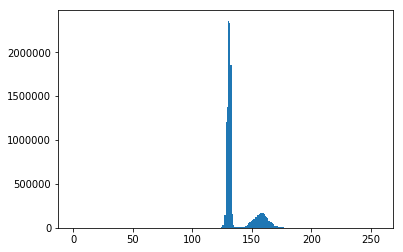

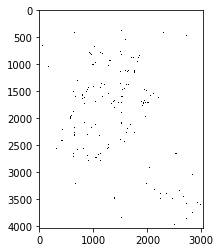

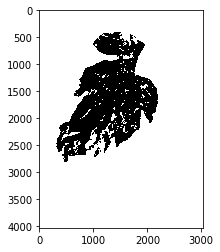

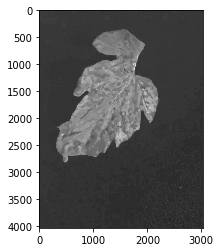

In [6]:
image_name = 'test/IMG_4177.jpg'
og = cv2.imread(image_name)
gray = cv2.imread(image_name, 0)

og = cv2.cvtColor(og, cv2.COLOR_BGR2LAB)

r, b,g = cv2.split(og)
gray = b
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(gray,-1,kernel)

# blur = cv2.GaussianBlur(gray,(3,3),0)
th = cv2.adaptiveThreshold(g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# plt.imshow(th, cmap=plt.cm.gray)
# plt.show();
# img=cv2.bitwise_not(th, th)
hist_full = cv2.calcHist([g],[0],None,[256],[0,256])
test = g.copy()

test[test < np.argmax(hist_full) - 5] = 255
test[test > np.argmax(hist_full) + 10] = 255
test[test < 255] = 0

canny = cv2.Canny(test, 30, 100)
canny = cv2.dilate(canny, None,iterations=2)
cnts = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

rgb = cv2.cvtColor(test, cv2.COLOR_GRAY2RGB)

cropped = og[y:y + h, x:x + w]
cropped_rgb = rgb[y:y + h, x:x + w]

cropped[cropped_rgb < 50] = 0
resized = cv2.resize(cropped, (1000, 1000))
cv2.imwrite('jasjdn.jpg', cropped)

cv2.imwrite('test.jpg', test)
plt.hist(g.ravel(),256,[0,256])
plt.show()

cv2.imwrite('a.jpg', b)
cv2.imwrite('b.jpg', g)
_, thresh = cv2.threshold(g, 150, 170, cv2.THRESH_BINARY_INV)
canny = cv2.erode(thresh, np.ones((3, 3)),iterations=3)

plt.imshow(th, cmap='gray')
plt.show()
plt.imshow(thresh, cmap='gray')
plt.show()
plt.imshow(g, cmap='gray')
plt.show()

In [2]:

def makeSquare(not_square):
    # Adds black pixels as padding
    
    BLACK = [0, 0, 0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square, (2 * width, 2 * height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        if (height > width):
            pad = (height - width)/2
            pad = int(pad)
            #doublesize = int(doublesize)
            doublesize_square = cv2.copyMakeBorder(doublesize, 0, 0, pad,\
                                                  pad, cv2.BORDER_CONSTANT, value = BLACK)
        else:
            pad = (width - height)/2
            pad = int(pad)
            doublesize_square = cv2.copyMakeBorder(doublesize, pad, pad, 0, 0,\
                                                  cv2.BORDER_CONSTANT, value = BLACK)
    doublesize_square_dim = doublesize_square.shape
    return doublesize_square

In [44]:
for directory in os.listdir('../dataset/non_segmented/'):
    images = os.listdir('../dataset/non_segmented/' + directory + '/indoors/')
    for image_name in tqdm(images):
        img_name = image_name
        image_name = '../dataset/non_segmented/' + directory + '/indoors/' + image_name
        og = cv2.imread(image_name)
        gray = cv2.imread(image_name, 0)

        lab = cv2.cvtColor(og, cv2.COLOR_BGR2LAB)

        l, a, b = cv2.split(lab)

        hist_full = cv2.calcHist([b],[0],None,[256],[0,256])
        
        peak = np.argmax(hist_full)
        max_score = hist_full[peak]
        thresh_score = max_score / 35

        for i in range(peak, 0, -1):
            if hist_full[i] < thresh_score:
                min_thresh = i
                break

        for i in range(peak, 256):
            if hist_full[i] < thresh_score:
                max_thresh = i
                break
        
        b_component = b.copy()

        b_component[b_component < min_thresh] = 255
        b_component[b_component > max_thresh] = 255
        b_component[b_component < 255] = 0

        b_component = cv2.erode(b_component, None,iterations=2)
        b_component = cv2.dilate(b_component, None,iterations=3)

#         canny = cv2.Canny(b_component, 30, 100)
        # canny = cv2.dilate(canny, None,iterations=3)

        cnts = cv2.findContours(b_component.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)

        rgb = cv2.cvtColor(b_component, cv2.COLOR_GRAY2RGB)

        cropped = og[y:y + h, x:x + w]
        cropped_rgb = rgb[y:y + h, x:x + w]

        cropped[cropped_rgb < 50] = 0

        cropped = makeSquare(cropped)
        cropped = cv2.resize(cropped, (246, 246))
        cropped = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value = [0, 0, 0])

        cv2.imwrite('../dataset/non_segmented/' + directory + '/segmented/' + img_name, cropped)

100%|██████████| 20/20 [00:01<00:00, 13.19it/s]


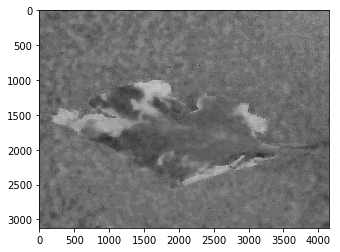

121 146 [76423.375] 125
[2674818.]


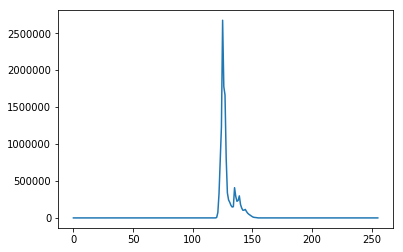

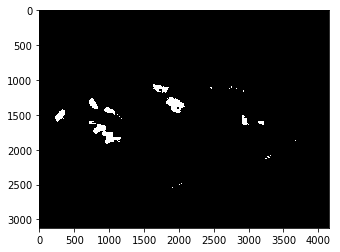

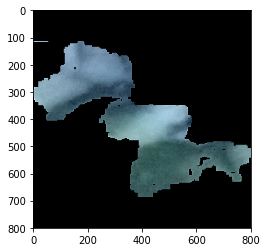

In [48]:
# /home/praneet/Projects/Plant_Monitor/dataset/non_segmented/early blight/segmented/IMG20190204142624.jpg

image_name = '../dataset/non_segmented/late blight/indoors/IMG20190326124937.jpg'
og = cv2.imread(image_name)
gray = cv2.imread(image_name, 0)

lab = cv2.cvtColor(og, cv2.COLOR_BGR2LAB)

l, a, b = cv2.split(lab)
plt.imshow(gra, cmap='gray')
plt.show()
hist_full = cv2.calcHist([b],[0],None,[256],[0,256])

peak = np.argmax(hist_full)
max_score = hist_full[peak]
thresh_score = max_score / 35

for i in range(peak, 0, -1):
    if hist_full[i] < thresh_score:
        min_thresh = i
        break
        
for i in range(peak, 256):
    if hist_full[i] < thresh_score:
        max_thresh = i
        break
print(min_thresh, max_thresh, thresh_score, peak)

print(hist_full[np.argmax(hist_full)])

plt.plot(hist_full)
plt.show()
b_component = b.copy()

b_component[b_component < min_thresh] = 255
b_component[b_component > max_thresh] = 255
b_component[b_component < 255] = 0

b_component = cv2.erode(b_component, None,iterations=2)
b_component = cv2.dilate(b_component, None,iterations=3)

# canny = cv2.Canny(b_component, 3, 3)
# plt.imshow(canny, cmap='gray')
# plt.show()

# canny = cv2.dilate(canny, None,iterations=3)
# plt.imshow(canny, cmap='gray')
# plt.show()

cnts = cv2.findContours(b_component.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(c)

rgb = cv2.cvtColor(b_component, cv2.COLOR_GRAY2RGB)
plt.imshow(rgb, cmap='gray')
plt.show()
cropped = og[y:y + h, x:x + w]
cropped_rgb = rgb[y:y + h, x:x + w]

cropped[cropped_rgb < 50] = 0

cropped = makeSquare(cropped)
plt.imshow(cropped, cmap='gray')
plt.show()
# cv2.imwrite('img_name.jpg', cropped)

# Script to super impose image on another image

In [2]:
img = cv2.imread('cropped_segmented_newcheck.jpg')
resized = cv2.resize(img, (600, 600))
cv2.imwrite('for_script.jpg', resized)

True

In [15]:
leaf = cv2.imread('for_script.jpg')
watch = cv2.imread('600.jpg')
gray = cv2.imread('for_script.jpg', 0)
_, gray = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
cv2.imshow('leaf', leaf)
cv2.imshow('watch', watch)

# cv2.imshow('gray', gray)

b, g, r = cv2.split(leaf)
bw, gw, rw = cv2.split(watch)

# print(b)
bw[gray > 0] = 255
gw[gray > 0] = 255
rw[gray > 0] = 255
    
for idx, i in enumerate(b):
    for idxj, j in enumerate(i):
        if (gray[idx][idxj] > 0):
            bw[idx][idxj] = j
        
for idx, i in enumerate(g):
    for idxj, j in enumerate(i):
        if (gray[idx][idxj] > 0):
            gw[idx][idxj] = j
        
for idx, i in enumerate(r):
    for idxj, j in enumerate(i):
        if (gray[idx][idxj] > 0):
            rw[idx][idxj] = j

watch = cv2.merge((bw, gw, rw))
# watch[0][leaf[0] == 0] = 0
# watch[1][leaf[1] == 0] = 0
# watch[2][leaf[2] == 0] = 0
cv2.imshow('title', watch)
cv2.imwrite('superimposed.jpg', watch)
cv2.waitKey(0)
cv2.destroyAllWindows()